# Assignment 1: Atmosphere - Green House Gases

Rosemary Knight (rknight@stanford.edu) & Seogi Kang (sgkang09@stanford.edu), Stanford Environmental Geophysics Group

In this assignment, we will explore green houses gases including CO2, CH4, NO2 in the atmospheric system, which drives the climate change. Data sets used this assignment are: 1) CO2 (time-series measured at Mauna Loa Observatory); 2) CO2 (gridded); 3) CH4 (gridded) ;4) NO2 (gridded); 5) CO (gridded; not green house gases but effects the amount of greenhouse gases).

This is the first assignment of the course, and we will use this and the next assignment to introduce core tools inluding Goolge Colab (similar to Jupyter Notebook) and Python packages that we are going to use throughout the course. The list of core Python packages are 

1. `numpy`: for calculating  mathematical functions
2. `matplotlib`: for visualization
3. `pandas`: for handling data in a table form
4. `xarray`: for handling gridded data 
5. `cartopy`: for visualizing gridded data on to a 2D map
6. `ipywidgets`: for creating interactive apps (exploration of data)

## Install Requred Packages

In [2]:
!pip install xarray numpy pandas geopandas cartopy==0.19.0.post1 ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 28.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.9 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp38-cp38-linux_x86_64.whl size=12659583 sha256=48f7ca743f432f35f52fd80e602f11fce55431e99f684bb59c2638f22a29afde
  Stored in directory: /root/.cache/pip/wheels/d7/7e/a7/f1de106b1da02e78db1fc6ff482fda367f8902856faa85d1c6
Successf

In [3]:
!pip uninstall -y shapely

Found existing installation: shapely 2.0.0
Uninstalling shapely-2.0.0:
  Successfully uninstalled shapely-2.0.0


In [4]:
!pip install shapely --no-binary shapely

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.5/274.5 KB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/61/76/6e635cc4ba33e8c170ef5934dad5c269dc5cb9607e878efb2aba12f78361/shapely-2.0.0.tar.gz#sha256=11f1b1231a6c04213fb1226c6968d1b1b3b369ec42d1e9655066af87631860ea (from https://pypi.org/simple/shapely/) (requires-python:>=3.7): Requested unknown from https://files.pythonhosted.org/packages/61/76/6e635cc4ba33e8c170ef5934dad5c269dc5cb9607e878efb2aba12f78361/shapely-2.0.0.tar.gz#sha256=11f1b1231a6c04213fb1226c6968d1b1b3b369ec42d1e9655066af87631860ea has inconsistent name: filename has 'shapely', but metadata has 'unknown'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 KB 16.2 MB/s 

## Download required data

In [5]:
!git clone https://premonition.stanford.edu/sgkang09/taking_the_pulse_atmosphere_data.git

Cloning into 'taking_the_pulse_atmosphere_data'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 27 (delta 7), reused 0 (delta 0), pack-reused 7
Unpacking objects: 100% (27/27), done.
Checking out files: 100% (9/9), done.


## Import some Python packages

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
from matplotlib.colors import LogNorm
import datetime
import warnings
warnings.filterwarnings('ignore')
# matplotlib.rcParams['font.size'] = 14

## Working with CO2 data using `pandas`

Let's start with a monthly time-series of CO2 level measured at Mauna Loa Observatory. We are going to read the CO2 level a csv format using `pandas`. 

### Introducing `pandas`, `numpy`, `maplotlib`

In [7]:
import pandas as pd

In [8]:
df_co2 = pd.read_csv('./taking_the_pulse_atmosphere_data/co2_gml.csv')

In [9]:
df_co2.head(3)

,year,month,monthly_average_co2,de-seasonalized_co2
0,1958.0,3.0,315.70,314.43
1,1958.0,4.0,317.45,315.16
2,1958.0,5.0,317.51,314.71


In [10]:
df_co2.tail(3)

,year,month,monthly_average_co2,de-seasonalized_co2
774,2022.0,9.0,415.95,419.50
775,2022.0,10.0,415.78,419.14
776,2022.0,11.0,417.51,419.53


Access data in pandas dataframe

In [11]:
# generate DatetimeIndex from years and months
years = df_co2['year'].values.astype(int)
months = df_co2['month'].values.astype(int)
times = [datetime.date(years[ii], months[ii], 1) for ii in range(df_co2.shape[0])]
time_series = pd.to_datetime(times)
df_co2['time'] = time_series
df_co2 = df_co2.set_index('time')

Explain the above cell line-by-line

- numpy array
- list comprehension
- `datetime.date`
- `pd.to_datetime`
- ...

A useful tip: auto completion [shift + space; or command + space on mac]

In [12]:
# demo

So no we are ready to plot the CO2 time-series. Let's plot them using `pandas`

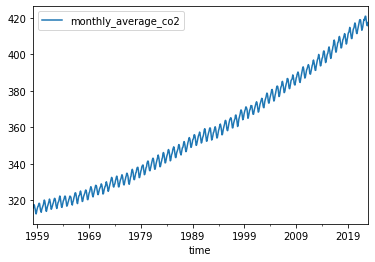

In [13]:
df_co2.plot(y='monthly_average_co2')

We could fine-tune the plot using `matplotlib`

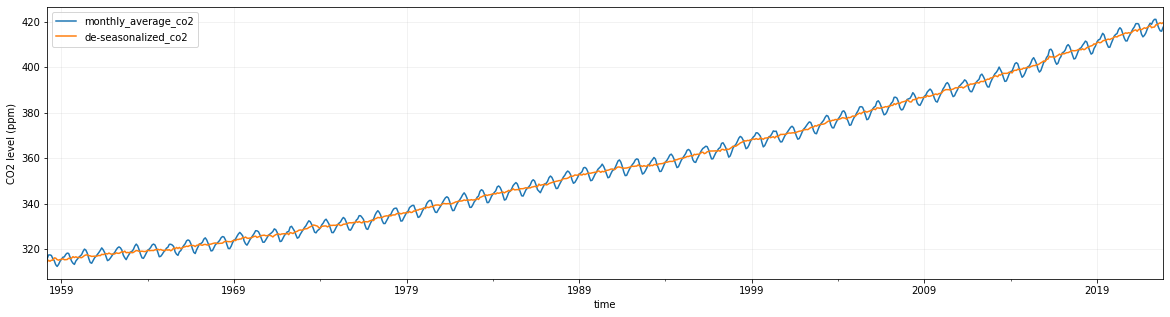

In [14]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
df_co2.plot(y='monthly_average_co2', ax=ax)
df_co2.plot(y='de-seasonalized_co2', ax=ax)
ax.grid(True, alpha=0.2)
ax.set_ylabel("CO2 level (ppm)")
ax.legend()

Suppose you just want select the data between 1960 and 1980, and plot them up, how could you do this?

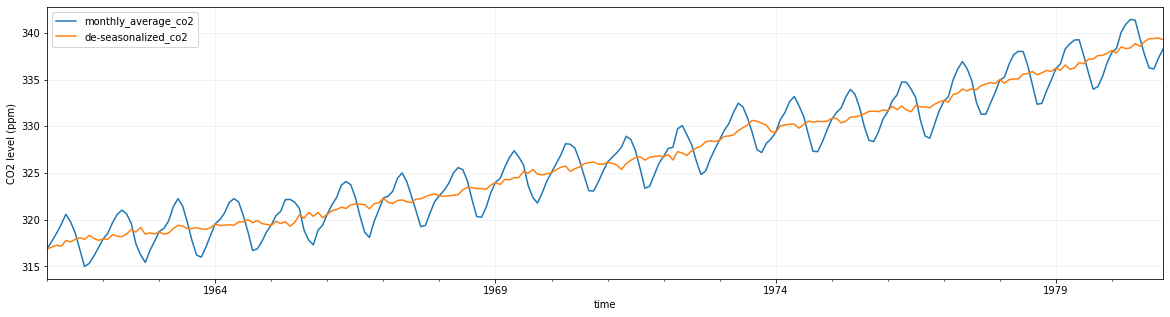

In [15]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
year_min = 1960
year_max = 1980
# find indicies between 1960 and 1980
index_time = np.logical_and(year_min<time_series.year, year_max>=time_series.year)
df_co2.loc[time_series[index_time]].plot(y='monthly_average_co2', ax=ax)
df_co2.loc[time_series[index_time]].plot(y='de-seasonalized_co2', ax=ax)
ax.grid(True, alpha=0.2)
ax.set_ylabel("CO2 level (ppm)")
ax.legend()

Although the table includes `de-seasonalized_co2`, as an exercise we are going to remove seasonal changes by using a moving average. 

In [16]:
df_series = df_co2['monthly_average_co2'].rolling(window=12, center=True).mean()

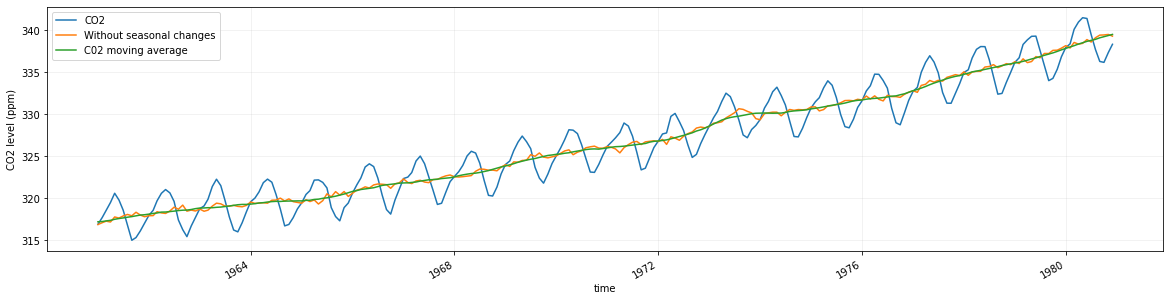

In [17]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
year_min = 1960
year_max = 1980
index_time = np.logical_and(year_min<time_series.year, year_max>=time_series.year)
ax.plot(time_series[index_time], df_co2['monthly_average_co2'].values[index_time], label="CO2", marker='None')
ax.plot(time_series[index_time], df_co2['de-seasonalized_co2'].values[index_time], label="Without seasonal changes", marker='None')
df_series.loc[time_series[index_time]].plot(label='C02 moving average')
ax.grid(True, alpha=0.2)
ax.set_ylabel("CO2 level (ppm)")

ax.legend()

You could also estimate a linear trend using linear regression. 

In [18]:
def linear_fit(time_series, data):
    # assume the time series has a regular sampling rate
    times = np.arange(len(time_series))
    G = np.c_[times, np.ones_like(times)]
    Pinv = np.linalg.pinv(G)
    m = Pinv.dot(data)
    predicted_data = G @ m
    slope = m[0,:]
    intercept = m[1,:]
    return predicted_data, slope, intercept

In [19]:
predicted_data, slope, intercept = linear_fit(time_series[index_time], df_co2['monthly_average_co2'].values[index_time].reshape([-1,1]))

In [20]:
slope * 12

array([1.0892873])

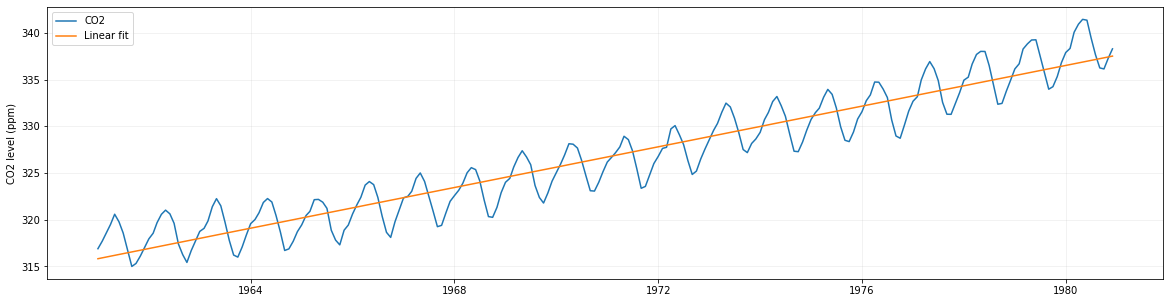

In [21]:
fig, ax = plt.subplots(1,1, figsize=(20, 5))
ax.plot(time_series[index_time], df_co2['monthly_average_co2'].values[index_time], label="CO2", marker='None')
ax.plot(time_series[index_time], predicted_data, label="Linear fit", marker='None')
ax.grid(True, alpha=0.2)
ax.set_ylabel("CO2 level (ppm)")
ax.legend()

If you want to add the linear trend back to the dataframe?

In [22]:
# Estimate the linear trend for all times
predicted_data, _, _ = linear_fit(time_series[:], df_co2['monthly_average_co2'].values[:].reshape([-1,1]))
df_co2['linear_trend_co2'] = predicted_data

In [23]:
df_co2.head(3)

,year,month,monthly_average_co2,de-seasonalized_co2,linear_trend_co2
time,,,,,
1958-03-01,1958.0,3.0,315.70,314.43,305.468965
1958-04-01,1958.0,4.0,317.45,315.16,305.603486
1958-05-01,1958.0,5.0,317.51,314.71,305.738008


The data is monthly, how do we make this montlhy data into annual data? We are going to use `groupby` operation available through pandas dataframe. 

In [24]:
df_co2_annual = df_co2.groupby('year')['monthly_average_co2'].mean()

In [25]:
df_co2_annual.head(3)

year
1958.0    315.232000
1959.0    315.980833
1960.0    316.910000
Name: monthly_average_co2, dtype: float64

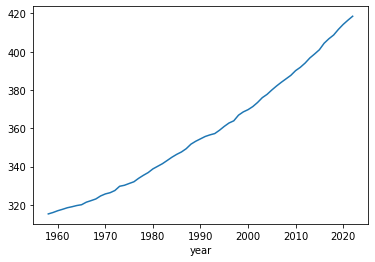

In [26]:
df_co2_annual.plot(legend=False)

## Working with gridded data using `xarray` and `cartopy`

### Introducing `xarray`

In [27]:
import xarray as xr

Now, we are going to load the gridded CO2 data in a [NETCDF](https://www.unidata.ucar.edu/software/netcdf/) format - a widely used data format for various atmopheric data. 

In [28]:
co2_data = xr.load_dataset('./taking_the_pulse_atmosphere_data/co2.nc')

Provide a nice summary of data structure. 

In [29]:
co2_data

<xarray.Dataset>
Dimensions:  (time: 84, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2021-12-31
  * lon      (lon) float64 -179.8 -178.8 -177.8 -176.8 ... 177.2 178.2 179.2
  * lat      (lat) float64 89.75 88.75 87.75 86.75 ... -87.25 -88.25 -89.25
Data variables:
    co2      (time, lat, lon) float64 400.6 400.6 400.6 ... 411.5 411.5 411.5
Attributes:
    Description:    CO2 data
    Unit:           ppmv (part per million per volume)
    Data document:  https://disc.gsfc.nasa.gov/datasets/OCO2_GEOS_L3CO2_MONTH...

Let's get some information about the data. 

- Time range
- Temporal resolution 
- ... 

In [30]:
co2_data.time.min()

<xarray.DataArray 'time' ()>
array('2015-01-31T00:00:00.000000000', dtype='datetime64[ns]')

In [31]:

co2_data.time.max()

<xarray.DataArray 'time' ()>
array('2021-12-31T00:00:00.000000000', dtype='datetime64[ns]')

In [32]:
co2_data.lon

<xarray.DataArray 'lon' (lon: 360)>
array([-179.75, -178.75, -177.75, ...,  177.25,  178.25,  179.25])
Coordinates:
  * lon      (lon) float64 -179.8 -178.8 -177.8 -176.8 ... 177.2 178.2 179.2

How do you access the data?

In [33]:
# demo - use co2 

Can we plot select a time slice of the data and plot a 2D map using `xarray`?

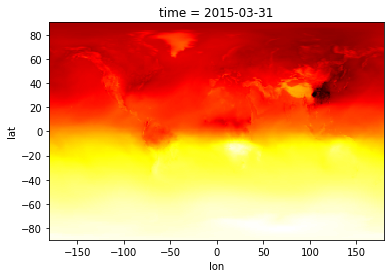

In [34]:
i_time = 2
co2_data.co2.isel(time=i_time).plot(add_colorbar=False, cmap='hot_r')

Or you could also input a date. 

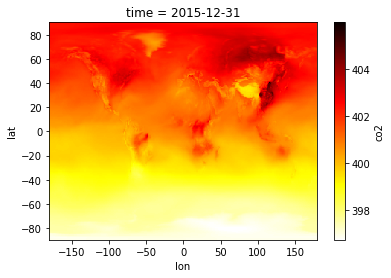

In [35]:
time = '2016-1-10'
co2_data.co2.sel(time=time, method='nearest').plot(add_colorbar=True, cmap='hot_r')

We could also select multiple times. Let's say we want all data between 2020-01 and 2021-12. Then we could first find corresponding indices of `time_series_co2` then input them. 

In [37]:
time_series_co2 = pd.to_datetime(co2_data.time.data)
index_tmp = np.logical_and(time_series_co2.year>=2015, time_series_co2.year<=2019)
co2_data_tmp = co2_data.sel(time=time_series_co2[index_tmp])
co2_data_tmp

<xarray.Dataset>
Dimensions:  (time: 60, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-31 2015-02-28 ... 2019-12-31
  * lon      (lon) float64 -179.8 -178.8 -177.8 -176.8 ... 177.2 178.2 179.2
  * lat      (lat) float64 89.75 88.75 87.75 86.75 ... -87.25 -88.25 -89.25
Data variables:
    co2      (time, lat, lon) float64 400.6 400.6 400.6 ... 407.1 407.1 407.1
Attributes:
    Description:    CO2 data
    Unit:           ppmv (part per million per volume)
    Data document:  https://disc.gsfc.nasa.gov/datasets/OCO2_GEOS_L3CO2_MONTH...

Access all the CO2 data and plot them in a histogram. 

Text(0.5, 0, 'CO2 level (ppm)')

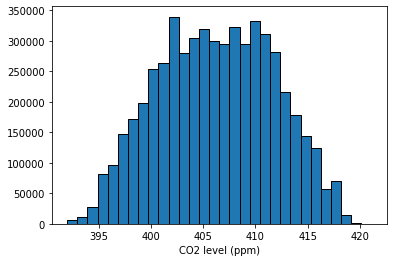

In [38]:
out = plt.hist(co2_data.co2.data.flatten(), bins=30, edgecolor='k')
plt.xlabel("CO2 level (ppm)")

We could go even more. Let's make an interactive plot. 

In [39]:
from ipywidgets import widgets, interact
def plot_co2(i_time):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    out = co2_data.co2.isel(time=i_time).plot(
        ax=ax, add_colorbar=False, cmap='hot_r', 
        vmin=390, vmax=420
      )
    plt.colorbar(out, fraction=0.02, orientation='horizontal', ax=ax)
    ax.set_aspect(1)
    plt.show()

Think about how would plot would change with time? Before you run below cell, and toggle the time slider through. 

In [40]:
interact(plot_co2, i_time = widgets.IntSlider(min=0, max=83, step=1))

interactive(children=(IntSlider(value=0, description='i_time', max=83), Output()), _dom_classes=('widget-inter…

<function __main__.plot_co2(i_time)>

We can do many more things using `xarray`. Let's calculate the mean CO2 values along the axis of Latitude and Longitude. Then plot the resulting time-series. 

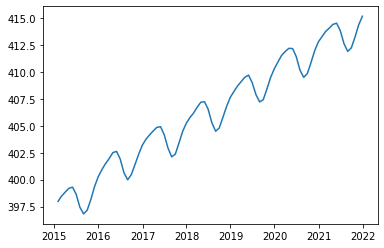

In [41]:
co2_mean_time_series = co2_data.mean(dim=['lat','lon'])
# below does not work..., unfortunately
# co2_mean_time_series.plot()
plt.plot(co2_mean_time_series.time, co2_mean_time_series.co2.data)

Or we could calculate the mean along the axis of Longitude (often greater variation in Latitudinal direction), and plot profiles of CO2 at different times. 

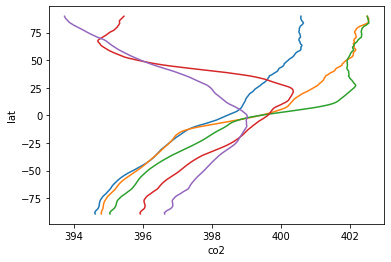

In [42]:
co2_lat = co2_data.mean(dim=['lon'])
co2_lat['co2'].isel(time=[0, 2, 4, 6, 8]).plot.line(y='lat', hue='time', add_legend=False)

Now we are going to calculate the linear trend every grid point in space. 

In [43]:
# Get co2 data as a numpy array, then reshape
co2_vec = co2_data.co2.data.reshape((co2_data.co2.data.shape[0], np.prod(co2_data.co2.data.shape[1:])))
time_series_co2 = pd.to_datetime(co2_data.time.data)
co2_linear_fit, slope, intercept = linear_fit(time_series_co2, co2_vec)

# Add resutls back to co2_data
co2_data['slope'] = (("lat", "lon"), slope.reshape(co2_data.co2.data.shape[1:]))
co2_data['intercept'] = (("lat", "lon"), intercept.reshape(co2_data.co2.data.shape[1:]))
co2_data['co2_linear_fit'] = (("time", "lat", "lon"), co2_linear_fit.reshape(co2_data.co2.data.shape))

year_min = pd.to_datetime(time_series_co2).min().strftime('%Y')
year_max = pd.to_datetime(time_series_co2).max().strftime('%Y')

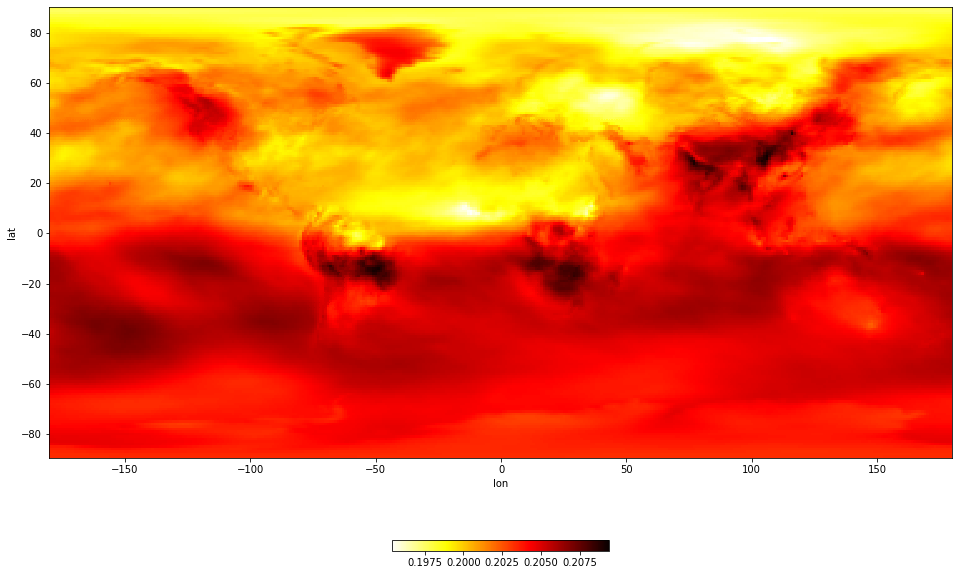

In [44]:
fig, ax = plt.subplots(1,1, figsize=(20, 10))
out = co2_data['slope'].plot(ax=ax, add_colorbar=False, cmap='hot_r')
plt.colorbar(out, fraction=0.02, orientation='horizontal', ax=ax)
ax.set_aspect(1)

2D maps look cool, but what if you would want to add some geographic boundaries?

### Introducing cartopy

In [47]:
import cartopy.crs as ccrs
import cartopy.feature as cf

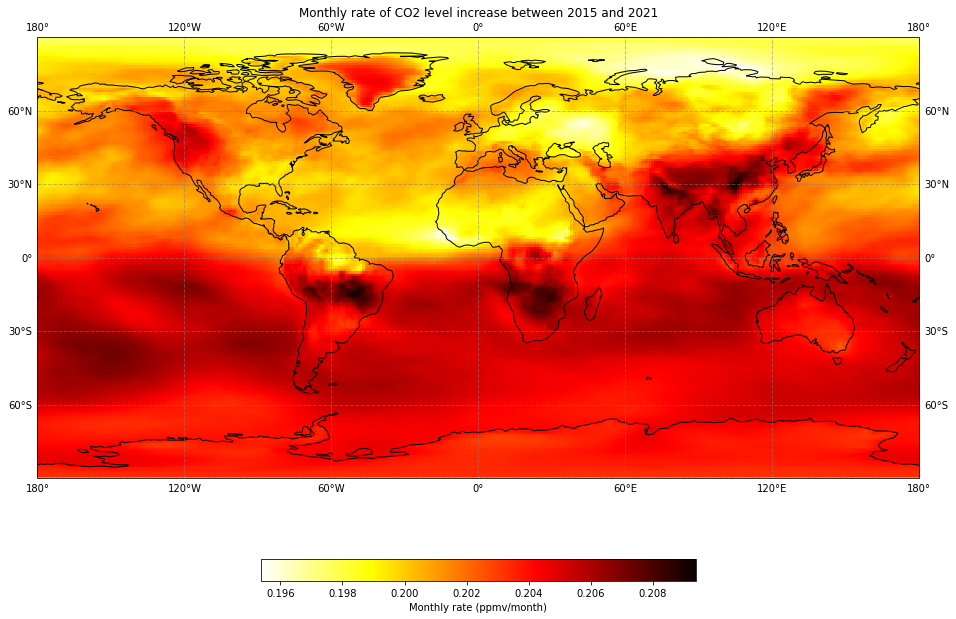

In [48]:
fig = plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.axes.add_feature(cf.COASTLINE)
out = co2_data['slope'].plot(ax=ax, add_colorbar=False, cmap='hot_r')
cb = plt.colorbar(out, fraction=0.04, orientation='horizontal')
cb.set_label("Monthly rate (ppmv/month)")
ax.set_aspect(1)
ax.set_title("Monthly rate of CO2 level increase between {:s} and {:s}".format(year_min, year_max))

gl = ax.gridlines(
    crs=ccrs.PlateCarree(), 
    draw_labels=True,
    linewidth=1, 
    color='gray', 
    alpha=0.5, 
    linestyle='--'
)

You could access geographic boundaries ... if you like. 

In [49]:
geometries = list(cf.BORDERS.geometries())

## Homework Questions 



### Q1: Work with the CO2 time-series measured at Mauna Loa Observatory, calculate the mean CO2 values for each month, and plot the resulting values as a function of month; for CO2 values use the second column - "monthly_average_co2". **[Hint: use `groupby` operation]** Write relvant codes the below cell. What do you see in the plot? Describe the plot.

In [50]:
# Answer:

### Q2: Work with the same time-series, calculate the trend of CO2 (i.e. rate in ppmv/decade) within each decade strating from 1950 and eding 2020 using the `linear_fit` function, and plot the resulting rates as a function of year. Write relvant codes the below cell. Which decade show the largest CO2 increase? [this is supposed to be 2010-2020]

In [51]:
# Answer

### Q3: Working with the gridded CO2 data, calclulate the linear trend between 2020-01 and 2021-12, and plot them as a 2D map. **[Hint: You first need to select the CO2 data between 2020-01 and 2021-12 then generate a new data set, then apply the `linear_fit` function]**

In [52]:
# Answer

### Q4: Pick a gridded data set among four given below, and calculate the linear trend, and plot the calculated rate on a 2D map. Use `cartopy` and add the coast line in the map. 

- CH4: ./taking_the_pulse_atmosphere_data/ch4.nc
- NO2: ./taking_the_pulse_atmosphere_data/no2.nc
- CO: ./taking_the_pulse_atmosphere_data/co.nc

In [53]:
# Answer